In [1]:
%pylab inline
import sys; sys.path.insert(0, "../")
import numpy as np
import time
from emcee.autocorr import *
from ensemble_sampler import *

import seaborn as sns
from pandas import DataFrame

Populating the interactive namespace from numpy and matplotlib


# Example of sampling from Rosenbrock density  
$f(x_1, x_2) \propto \exp(-[a(x_2 - x_1^2)^2 + (1-x_1)^2]\ / \ b)$  

## Large ensemble size

In [5]:
dim = 2
nwalkers = 100
batch_size = 1
niters = 100000
t_dist = Rosenbrock()

### Stretch Move

In [3]:
proposal = StretchMove(a=2.0)

start = time.time()
sampler = Sampler(dim=dim, t_dist=t_dist, proposal=proposal, nwalkers=nwalkers)
sampler.run_mcmc(niters, random_start=True, store=True)
print time.time() - start

chain = sampler._history.get_flat('chain')

18.4069669247


The chain is too short to reliably estimate the autocorrelation time


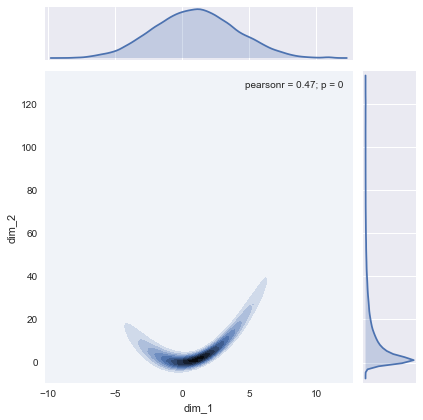

In [4]:
try:
    print sampler.auto_corr()
except AutocorrError, err:
    print err
    
x, y = ['dim_1', 'dim_2']
df = DataFrame(np.vstack([chain[::100, 0], chain[::100, 1]]).T, columns=[x, y])
sns.jointplot(x=x, y=y, data=df, kind='kde')

/usr/local/lib/python2.7/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


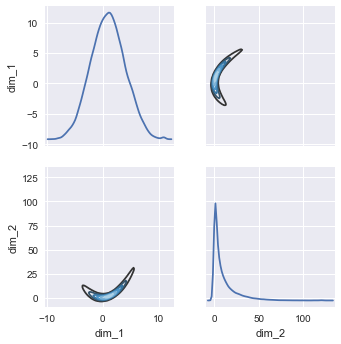

In [5]:
g = sns.PairGrid(df)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, cmap="Blues_d", n_levels=6)

### Stretch Move, emcee

In [6]:
import emcee

class Rosenbrock(object):
    def __init__(self):
        self.a1 = 100.0
        self.a2 = 20.0

    def __call__(self, p):
        return -(self.a1 * (p[1] - p[0] ** 2) ** 2 + (1 - p[0]) ** 2) / self.a2
    
p0 = np.random.rand(nwalkers * dim).reshape(nwalkers, dim)
start = time.time()
sampler = emcee.EnsembleSampler(nwalkers, dim, Rosenbrock())
hist = sampler.run_mcmc(p0, N=niters)
print time.time() - start

42.6726810932


The chain is too short to reliably estimate the autocorrelation time


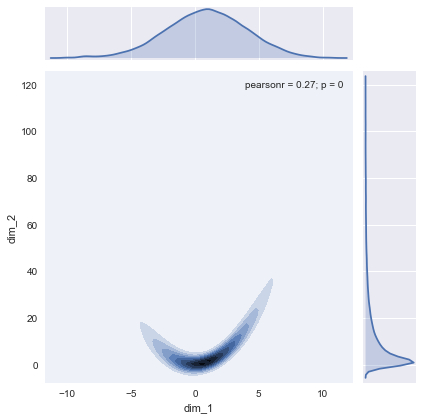

In [7]:
try:
    print sampler.acor
except AutocorrError, err:
    print err
    
chain = sampler.flatchain
x, y = ['dim_1', 'dim_2']
df = DataFrame(np.vstack([chain[::100, 0], chain[::100, 1]]).T, columns=[x, y])
sns.jointplot(x=x, y=y, data=df, kind='kde')

### Walk Move with pCN

In [8]:
proposal = PCNWalkMove(s=None, scale=0.3)
sampler = Sampler(dim=dim, t_dist=t_dist, proposal=proposal, nwalkers=nwalkers)

sampler.run_mcmc(niters, random_start=True, store=True)

The chain is too short to reliably estimate the autocorrelation time


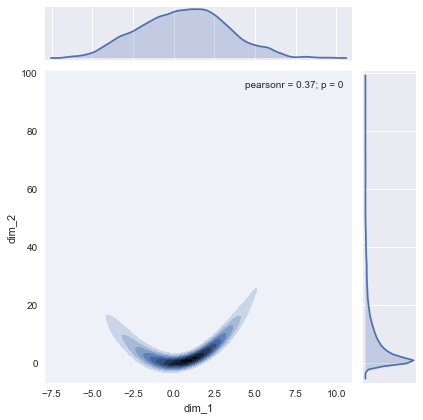

In [9]:
chain = sampler.history.get_flat('chain')
try:
    print sampler.auto_corr()
except AutocorrError, err:
    print err

x, y = ['dim_1', 'dim_2']
df = DataFrame(np.vstack([chain[::100, 0], chain[::100, 1]]).T, columns=[x, y])
sns.jointplot(x=x, y=y, data=df, kind='kde')

## Small ensemble size.

In [8]:
nwalkers = 4
niters = 1000

### Stretch Move, a=2.0

In [9]:
proposal = StretchMove(a=2.0)

sampler = Sampler(t_dist=t_dist, proposal=proposal, nwalkers=nwalkers)
sampler.run_mcmc(niters, random_start=True, store=True)

chain = sampler._history.get_flat('chain')

The chain is too short to reliably estimate the autocorrelation time


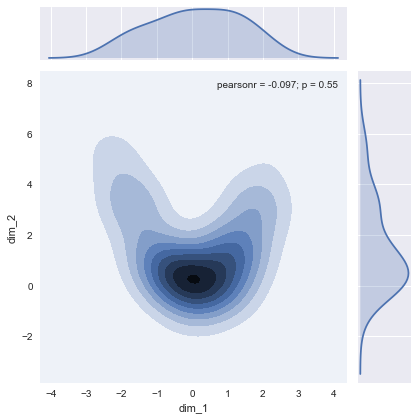

In [10]:
try:
    print sampler.auto_corr()
except AutocorrError, err:
    print err
    
x, y = ['dim_1', 'dim_2']
df = DataFrame(np.vstack([chain[::100, 0], chain[::100, 1]]).T, columns=[x, y])
sns.jointplot(x=x, y=y, data=df, kind='kde')

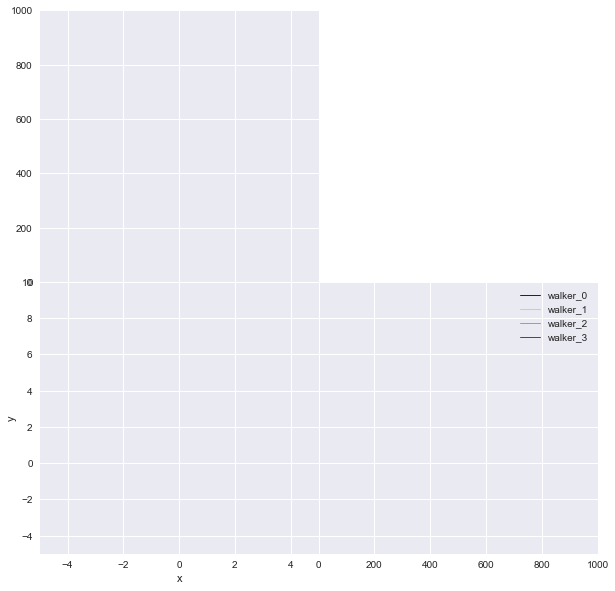

In [19]:
from matplotlib.animation import FuncAnimation
proposal = StretchMove(a=2.0)
sampler = Sampler(t_dist=t_dist, proposal=proposal, nwalkers=nwalkers)
hist = sampler.sample(niters, random_start=True)

visualizer = Visualizer(sampler.history, False, max_len=niters)
anim = FuncAnimation(fig=visualizer.fig, func=visualizer, init_func=visualizer.init,
                     frames=hist, interval=20, blit=True, save_count=niters)

In [20]:
from IPython.display import HTML
HTML(anim.to_html5_video())

### Walk move, S=3, scale=0.2.

In [15]:
proposal = WalkMove(s=3, scale=0.2)
sampler = Sampler(t_dist=t_dist, proposal=proposal, nwalkers=nwalkers)
sampler.run_mcmc(niters, batch_size=batch_size, random_start=True, store=True)

The chain is too short to reliably estimate the autocorrelation time


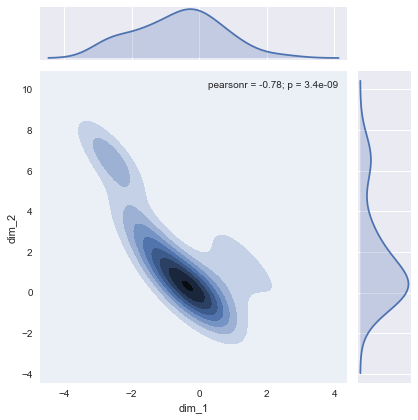

In [16]:
chain = sampler._history.get_flat('chain')
try:
    print sampler.auto_corr()
except AutocorrError, err:
    print err
    
x, y = ['dim_1', 'dim_2']
df = DataFrame(np.vstack([chain[::100, 0], chain[::100, 1]]).T, columns=[x, y])
sns.jointplot(x=x, y=y, data=df, kind='kde')

### Walk with pCN, beta=0.3  

In [17]:
proposal = WalkMove(s=3, beta=0.3)

sampler = Sampler(t_dist=t_dist, proposal=proposal, nwalkers=nwalkers)
sampler.run_mcmc(niters, batch_size=batch_size, random_start=True, store=True)

[ 16.85810833  14.55643152]


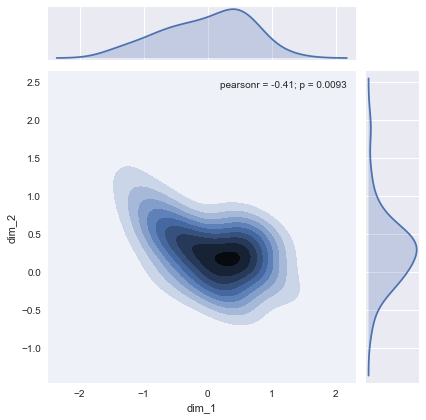

In [18]:
chain = sampler.history.get_flat('chain')
try:
    print sampler.auto_corr()
except AutocorrError, err:
    print err
    
x, y = ['dim_1', 'dim_2']
df = DataFrame(np.vstack([chain[::100, 0], chain[::100, 1]]).T, columns=[x, y])
sns.jointplot(x=x, y=y, data=df, kind='kde')